In [1]:
import os
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.convolution import convolve, Gaussian2DKernel
from reproject import reproject_interp
import aplpy
import astropy.units as u
from numpy import nan_to_num
from astropy.coordinates import SkyCoord
import pandas as pd
from statsmodels.formula.api import ols

In [12]:
constants = get_constants()
globals().update(constants)

In [13]:
process_fits_files(new_directory, sourcename, instrument, wavelengths,"filelist")

./data/Field_35_select/Field_35_Herschel_70micron.fits
./data/Field_35_select/Field_35_Herschel_160micron.fits
./data/Field_35_select/Field_35_Herschel_250micron.fits
./data/Field_35_select/Field_35_Herschel_350micron.fits
./data/Field_35_select/Field_35_Herschel_500micron.fits
New working directory: D:\astro
Filename: ./data/Field_35_select/Field_35_Herschel_70micron.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     290   ()      
  1  image         1 ImageHDU        52   (3842, 3932)   float64   
  2  error         1 ImageHDU        52   (3842, 3932)   float64   
  3  coverage      1 ImageHDU        52   (3842, 3932)   float64   
  4  als           1 ImageHDU        52   (3842, 3932)   float64   
  5  gls           1 ImageHDU        52   (3842, 3932)   float64   
  6  naive         1 ImageHDU        52   (3842, 3932)   float64   
  7  unimapLog     1 BinTableHDU     33   270R x 1C   [162A]   
  8  History       1 ImageHDU        23

In [14]:
convert_units_for_files(filelist, num_files, tunit, pixel_size, target_folder, "filelist_uc")

Updated file list (filelist_uc): ['./SEDresult/Field_35\\Field_35_Herschel_70micron_unit_convert.fits', './SEDresult/Field_35\\Field_35_Herschel_160micron_unit_convert.fits', './data/Field_35_select/Field_35_Herschel_250micron.fits', './data/Field_35_select/Field_35_Herschel_350micron.fits', './data/Field_35_select/Field_35_Herschel_500micron.fits']


In [15]:
process_fits_files_and_convolve_reproject(filelist_uc, "filelist_repro", target_folder, target_resolution, native_beamsize_list, pixel_size_list)

['./SEDresult/Field_35\\Field_35_Herschel_70micron_unit_convert_conv_reproj.fits', './SEDresult/Field_35\\Field_35_Herschel_160micron_unit_convert_conv_reproj.fits', './SEDresult/Field_35\\Field_35_Herschel_250micron_conv_reproj.fits', './SEDresult/Field_35\\Field_35_Herschel_350micron_conv_reproj.fits', './SEDresult/Field_35\\Field_35_Herschel_500micron_conv_reproj.fits']
Filename: ./SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert_conv_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      46   (894, 924)   float64   
  1  STDEV         1 ImageHDU        47   (894, 924)   float64   
None
Filename: ./SEDresult/Field_35\Field_35_Herschel_500micron_conv_reproj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  image         1 PrimaryHDU      46   (894, 924)   float64   
  1  STDEV         1 ImageHDU        47   (894, 924)   float64   
None


Cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_70micron_unit_convert_conv_reproj_cut.fits'
Cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_160micron_unit_convert_conv_reproj_cut.fits'
Cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_250micron_conv_reproj_cut.fits'
Cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_350micron_conv_reproj_cut.fits'
Cropped FITS file saved as './SEDresult/Field_35\Field_35_Herschel_500micron_conv_reproj_cut.fits'
List of cropped files: ['./SEDresult/Field_35\\Field_35_Herschel_70micron_unit_convert_conv_reproj_cut.fits', './SEDresult/Field_35\\Field_35_Herschel_160micron_unit_convert_conv_reproj_cut.fits', './SEDresult/Field_35\\Field_35_Herschel_250micron_conv_reproj_cut.fits', './SEDresult/Field_35\\Field_35_Herschel_350micron_conv_reproj_cut.fits', './SEDresult/Field_35\\Field_35_Herschel_500micron_conv_reproj_cut.fits']


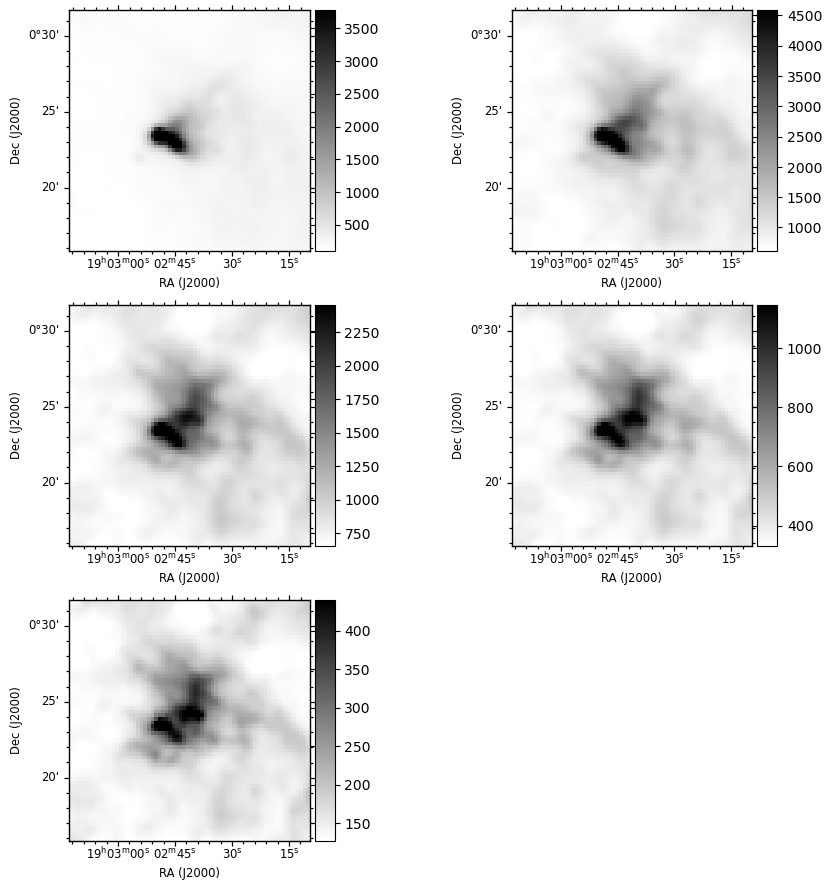

In [16]:
crop_and_plot_fits(filelist_repro, 'filelist_cut', ra, dec, radius_arcmin, target_folder)

In [17]:
fit_SED_all(filelist_cut, 'param_map', wavelengths, c, kappa_1000, h, h_k)

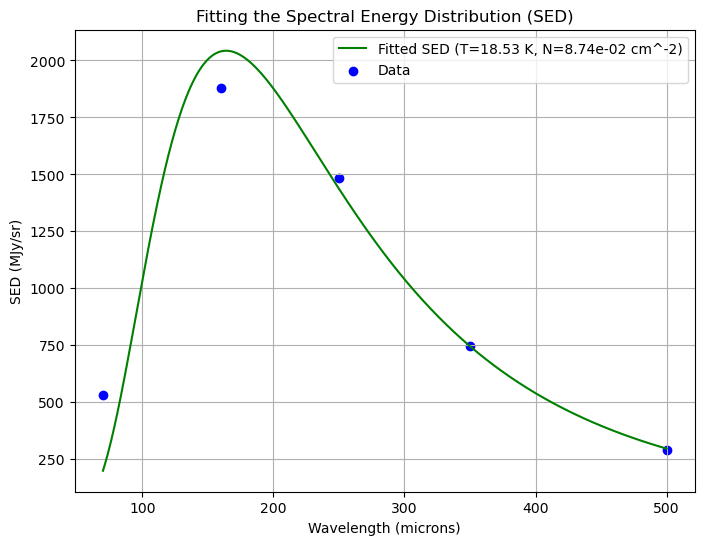

In [18]:
fit_single_pixel(filelist_cut, 'filelist_single', wavelengths, c, kappa_1000, h, h_k,pixel_coords=(40, 40))

INFO: Auto-setting vmin to  5.104e+21 [aplpy.core]
INFO: Auto-setting vmax to  2.772e+22 [aplpy.core]
INFO: Auto-setting vmin to  2.179e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.247e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.648e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.713e+01 [aplpy.core]


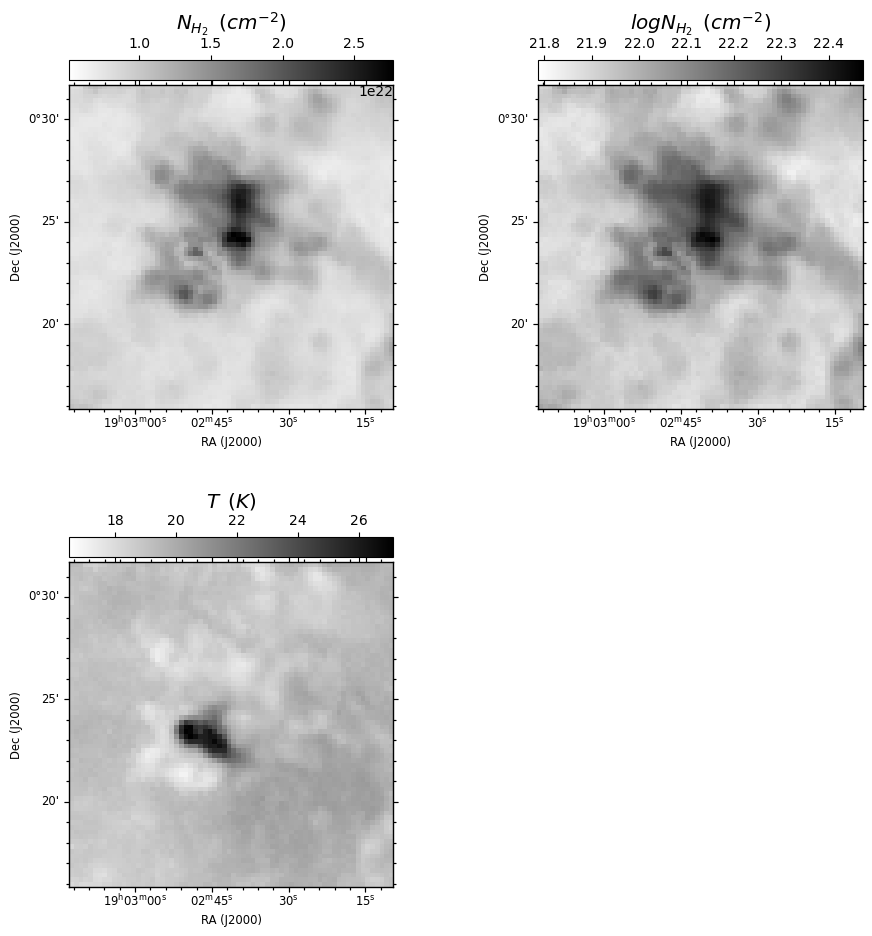

In [19]:
log_and_save_fits(param_map)

In [20]:
calculate_cloud_mass(target_resolution, distance_pc)

Total mass: 132467.13 M☉
